<a href="https://colab.research.google.com/github/emmanoel43/NGG6050/blob/main/Data_Visualization_Noel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

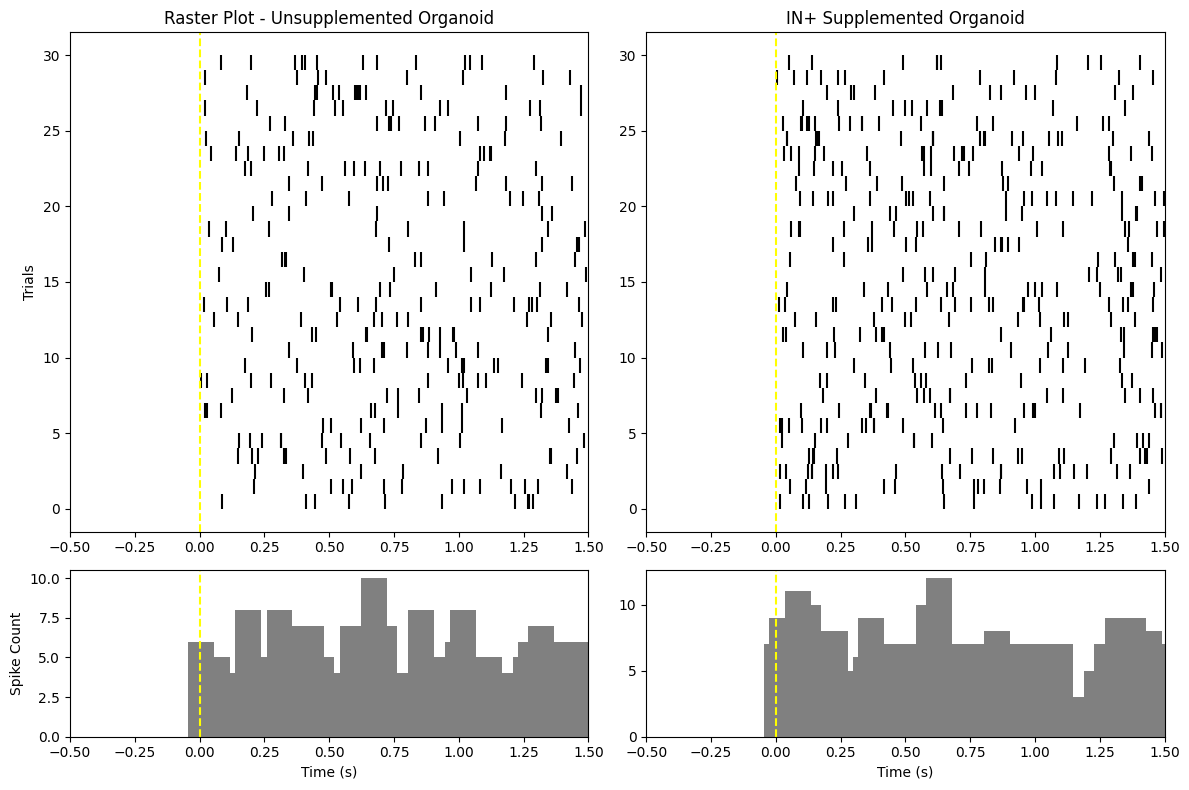

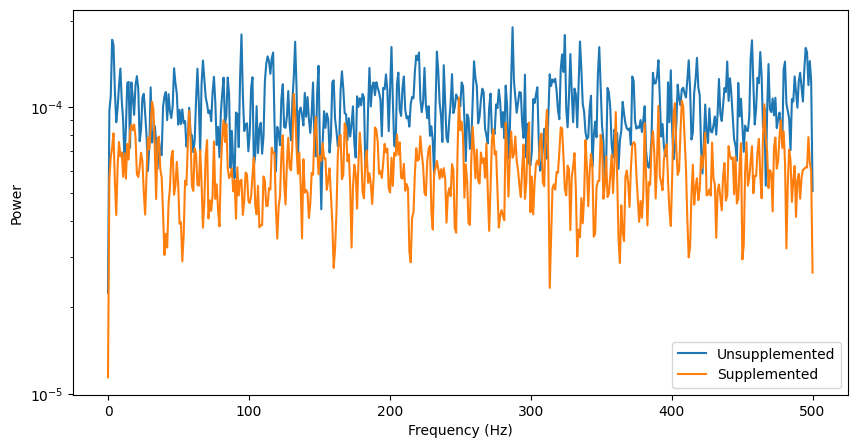

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters
num_trials = 30  # Number of trials
time_window = (-0.5, 1.5)  # Time window from -0.5s to 1.5s relative to stimulus onset
time_bins = np.linspace(time_window[0], time_window[1], 100)  # Time bins for histogram

# Simulate spike times for Condition D and Condition E
np.random.seed(0)  # For reproducibility
spike_times_condition_D = [np.random.uniform(0, 1.5, np.random.randint(5, 15)) for _ in range(num_trials)]
spike_times_condition_E = [np.random.uniform(0, 1.5, np.random.randint(10, 20)) for _ in range(num_trials)]

# Create a figure with subplots for raster plots and histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Raster Plot for Condition D
for i, trial in enumerate(spike_times_condition_D):
    axs[0, 0].vlines(trial, i, i + 1, color='black')
axs[0, 0].axvline(x=0, color='yellow', linestyle='--')  # Stimulus onset line
axs[0, 0].set_title("Raster Plot - Unsupplemented Organoid")
axs[0, 0].set_xlim(time_window)
axs[0, 0].set_ylabel("Trials")

# Raster Plot for Condition E
for i, trial in enumerate(spike_times_condition_E):
    axs[0, 1].vlines(trial, i, i + 1, color='black')
axs[0, 1].axvline(x=0, color='yellow', linestyle='--')  # Stimulus onset line
axs[0, 1].set_title("IN+ Supplemented Organoid")
axs[0, 1].set_xlim(time_window)

# PSTH (Histogram) for Condition D
psth_counts_D, _ = np.histogram(np.concatenate(spike_times_condition_D), bins=time_bins)
axs[1, 0].bar(time_bins[:-1], psth_counts_D, width=0.1, color='gray')
axs[1, 0].axvline(x=0, color='yellow', linestyle='--')  # Stimulus onset line
axs[1, 0].set_xlim(time_window)
axs[1, 0].set_xlabel("Time (s)")
axs[1, 0].set_ylabel("Spike Count")

# PSTH (Histogram) for Condition E
psth_counts_E, _ = np.histogram(np.concatenate(spike_times_condition_E), bins=time_bins)
axs[1, 1].bar(time_bins[:-1], psth_counts_E, width=0.1, color='gray')
axs[1, 1].axvline(x=0, color='yellow', linestyle='--')  # Stimulus onset line
axs[1, 1].set_xlim(time_window)
axs[1, 1].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()

# Example time series data (simulated raster data with timestamps)
# Replace with actual spike time data for each condition
time_unsupplemented = np.sort(np.random.uniform(0, 10, 500))
time_supplemented = np.sort(np.random.uniform(0, 10, 300))

# Create a binary time series (spike train) with 1ms bins
bin_size = 0.001
time_bins = np.arange(0, 10, bin_size)
spike_train_unsupplemented = np.histogram(time_unsupplemented, bins=time_bins)[0]
spike_train_supplemented = np.histogram(time_supplemented, bins=time_bins)[0]

# Calculate PSD using Welch's method
freqs_unsupplemented, psd_unsupplemented = welch(spike_train_unsupplemented, fs=1/bin_size, nperseg=1024)
freqs_supplemented, psd_supplemented = welch(spike_train_supplemented, fs=1/bin_size, nperseg=1024)

# Plot PSDs
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_unsupplemented, psd_unsupplemented, label="Unsupplemented")
plt.semilogy(freqs_supplemented, psd_supplemented, label="Supplemented")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.show()



**Flashing Light Response: simulated data comparing single unit responses to light in interneuron supplemented and unsupplemented organoids**

<ipython-input-26-146b36f33ca3>:70: DeprecationWarning: You are passing x=[0.00505051 0.02525253 0.04545455 0.06565657 0.08585859 0.10606061
 0.12626263 0.14646465] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  area_under_peak_D = simpson(psth_counts_D[response_indices], time_bins[:-1][response_indices])
<ipython-input-26-146b36f33ca3>:71: DeprecationWarning: You are passing x=[0.00505051 0.02525253 0.04545455 0.06565657 0.08585859 0.10606061
 0.12626263 0.14646465] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  area_under_peak_E = simpson(psth_counts_E[response_indices], time_bins[:-1][response_indices])
<ipython-input-26-146b36f33ca3>:77: DeprecationWarning: You are passing x=[0.00505051 0.02525253 0.04545455 0.06565657 0.08585859 0.10606061
 0.12626263

Area under the response peak for Unsupplemented Organoids: 1.291245791245791
Area under the response peak for Supplemented Organoids): 8.166666666666655
Shapiro-Wilk Test for Condition D (Unsupplemented):
Statistic: 0.9489682559128125, p-value: 0.15862659061174206
Shapiro-Wilk Test for Condition E (Supplemented):
Statistic: 0.9809147171844865, p-value: 8.49e-01

Using t-test:
Statistic: -31.86824293431319, p-value:  1.88e-38


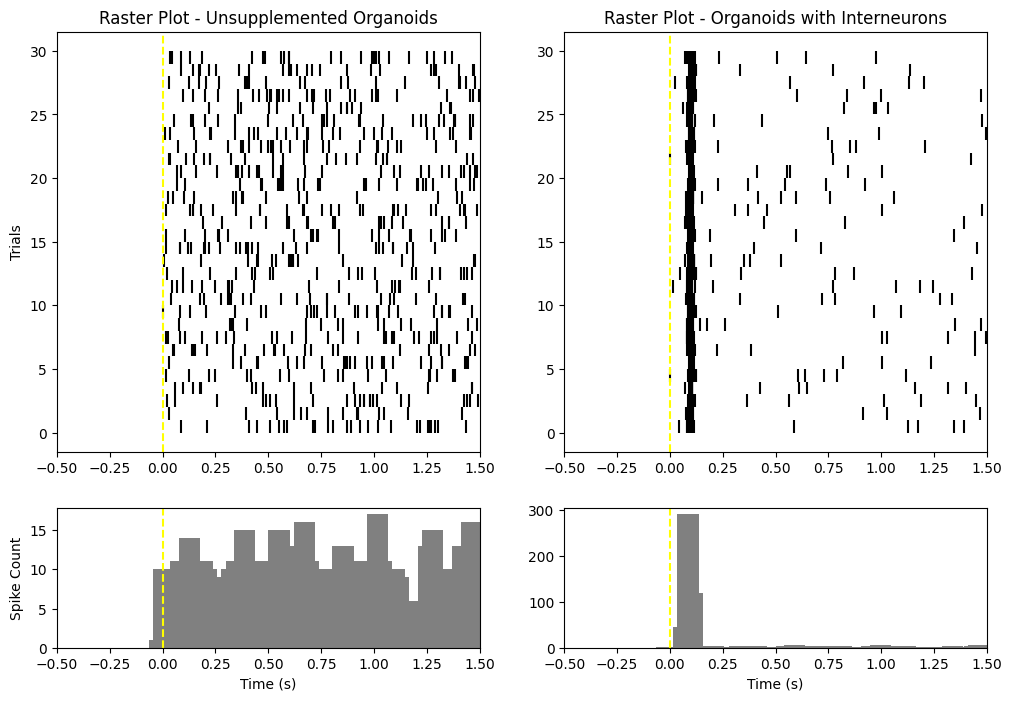

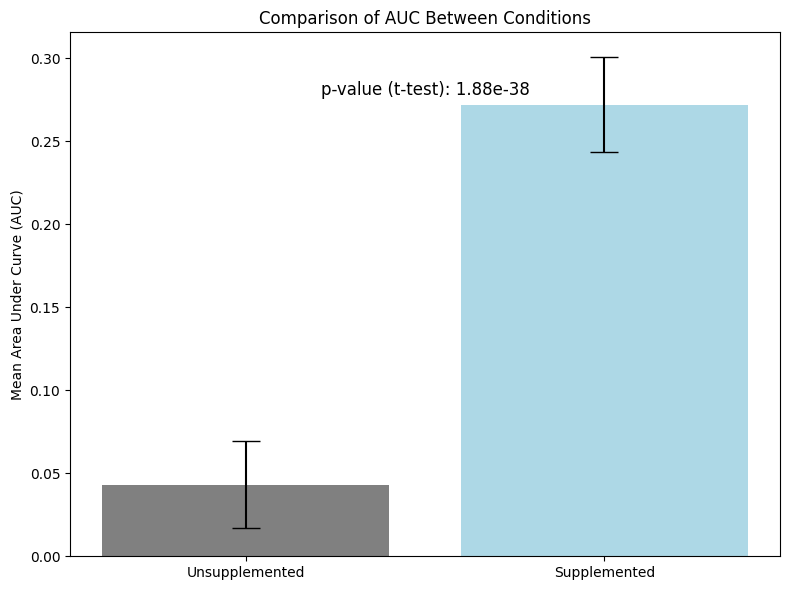

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
from scipy.integrate import simpson

# Set up parameters
num_trials = 30  # Number of trials
time_window = (-0.5, 1.5)  # Time window from -0.5s to 1.5s relative to stimulus onset
time_bins = np.linspace(time_window[0], time_window[1], 100)  # Time bins for histogram

# Simulate spike times for Condition D (Unsupplemented Organoids - Hyperexcitable, random spiking)
np.random.seed(0)  # For reproducibility
spike_times_condition_D = [
    np.random.uniform(0, 1.5, np.random.randint(15, 30)) for _ in range(num_trials)
]  # Higher spike frequency and random distribution

# Simulate spike times for Condition E (Organoids with Interneuron Supplementation - Single peak with noise)
spike_times_condition_E = []
for _ in range(num_trials):
    # Generate a burst of spikes around 100 ms after stimulus onset
    burst_spikes = np.random.normal(loc=0.1, scale=0.01, size=15)  # 15 spikes in a short burst
    burst_spikes = burst_spikes[(burst_spikes >= 0) & (burst_spikes <= 1.5)]  # Keep spikes within time window

    # Add some random noise spikes throughout the trial (low frequency)
    noise_spikes = np.random.uniform(0, 1.5, np.random.randint(3, 7))  # 3 to 7 random noise spikes per trial

    # Combine burst spikes with noise spikes
    trial_spikes = np.concatenate((burst_spikes, noise_spikes))
    spike_times_condition_E.append(np.sort(trial_spikes))  # Sort to keep spikes in time order

# Create a figure with subplots for raster plots and histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Raster Plot for Condition D
for i, trial in enumerate(spike_times_condition_D):
    axs[0, 0].vlines(trial, i, i + 1, color='black')
axs[0, 0].axvline(x=0, color='yellow', linestyle='--')  # Stimulus onset line
axs[0, 0].set_title("Raster Plot - Unsupplemented Organoids")
axs[0, 0].set_xlim(time_window)
axs[0, 0].set_ylabel("Trials")

# Raster Plot for Condition E
for i, trial in enumerate(spike_times_condition_E):
    axs[0, 1].vlines(trial, i, i + 1, color='black')
axs[0, 1].axvline(x=0, color='yellow', linestyle='--')  # Stimulus onset line
axs[0, 1].set_title("Raster Plot - Organoids with Interneurons")
axs[0, 1].set_xlim(time_window)

# PSTH (Histogram) for Condition D
psth_counts_D, _ = np.histogram(np.concatenate(spike_times_condition_D), bins=time_bins)
axs[1, 0].bar(time_bins[:-1], psth_counts_D, width=0.1, color='gray')
axs[1, 0].axvline(x=0, color='yellow', linestyle='--')  # Stimulus onset line
axs[1, 0].set_xlim(time_window)
axs[1, 0].set_xlabel("Time (s)")
axs[1, 0].set_ylabel("Spike Count")

# PSTH (Histogram) for Condition E
psth_counts_E, _ = np.histogram(np.concatenate(spike_times_condition_E), bins=time_bins)
axs[1, 1].bar(time_bins[:-1], psth_counts_E, width=0.1, color='gray')
axs[1, 1].axvline(x=0, color='yellow', linestyle='--')  # Stimulus onset line
axs[1, 1].set_xlim(time_window)
axs[1, 1].set_xlabel("Time (s)")

# Define response window based on stimulus onset and expected response duration
response_start = 0  # start of response window (adjust based on expected response)
response_end = 0.15  # end of response window (adjust based on expected response)
response_indices = (time_bins[:-1] >= response_start) & (time_bins[:-1] <= response_end)

# Calculate the area under the response peak for both conditions using Simpson's rule
area_under_peak_D = simpson(psth_counts_D[response_indices], time_bins[:-1][response_indices])
area_under_peak_E = simpson(psth_counts_E[response_indices], time_bins[:-1][response_indices])
print("Area under the response peak for Unsupplemented Organoids:", area_under_peak_D)
print("Area under the response peak for Supplemented Organoids):", area_under_peak_E)

# Collect area values for each trial for statistical testing
trial_areas_D = [
    simpson(np.histogram(trial, bins=time_bins)[0][response_indices], time_bins[:-1][response_indices])
    for trial in spike_times_condition_D
]
trial_areas_E = [
    simpson(np.histogram(trial, bins=time_bins)[0][response_indices], time_bins[:-1][response_indices])
    for trial in spike_times_condition_E
]

# Perform normality tests on AUC data for both conditions
shapiro_test_D = shapiro(trial_areas_D)
shapiro_test_E = shapiro(trial_areas_E)

print("Shapiro-Wilk Test for Condition D (Unsupplemented):")
print(f"Statistic: {shapiro_test_D.statistic}, p-value: {shapiro_test_D.pvalue}")
print("Shapiro-Wilk Test for Condition E (Supplemented):")
print(f"Statistic: {shapiro_test_E.statistic}, p-value: {shapiro_test_E.pvalue:.2e}")

# Determine which test to use based on normality
if shapiro_test_D.pvalue > 0.05 and shapiro_test_E.pvalue > 0.05:
    # Use independent t-test if both are normally distributed
    stat, p_value = ttest_ind(trial_areas_D, trial_areas_E)
    test_name = "t-test"
else:
    # Use Mann-Whitney U test if one or both are not normally distributed
    stat, p_value = mannwhitneyu(trial_areas_D, trial_areas_E)
    test_name = "Mann-Whitney U test"

print(f"\nUsing {test_name}:")
print(f"Statistic: {stat}, p-value: {p_value: .2e}")

# Plotting the AUC comparison with the statistical test result
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(["Unsupplemented", "Supplemented"], [np.mean(trial_areas_D), np.mean(trial_areas_E)],
       yerr=[np.std(trial_areas_D), np.std(trial_areas_E)], capsize=10, color=['gray', 'lightblue'])
ax.set_ylabel("Mean Area Under Curve (AUC)")
ax.set_title("Comparison of AUC Between Conditions")

# Display the p-value on the plot without obscuring data
p_text_y = max(np.mean(trial_areas_D), np.mean(trial_areas_E)) + 0.2 * max(np.std(trial_areas_D), np.std(trial_areas_E))
ax.text(0.5, p_text_y, f"p-value ({test_name}): {p_value:.2e}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


**Orientation tuning: simulated data comparing orientation selectivity of interneuron supplemented and unsupplemented organoids**
---



OSI for Unsupplemented Organoids: 0.09
OSI for Organoids with Interneurons: 0.15
Circular Variance for Unsupplemented Organoids: 0.91
Circular Variance for Organoids with Interneurons: 0.85
Mann-Whitney U test result: U-statistic = 1.0, p-value = 1.0


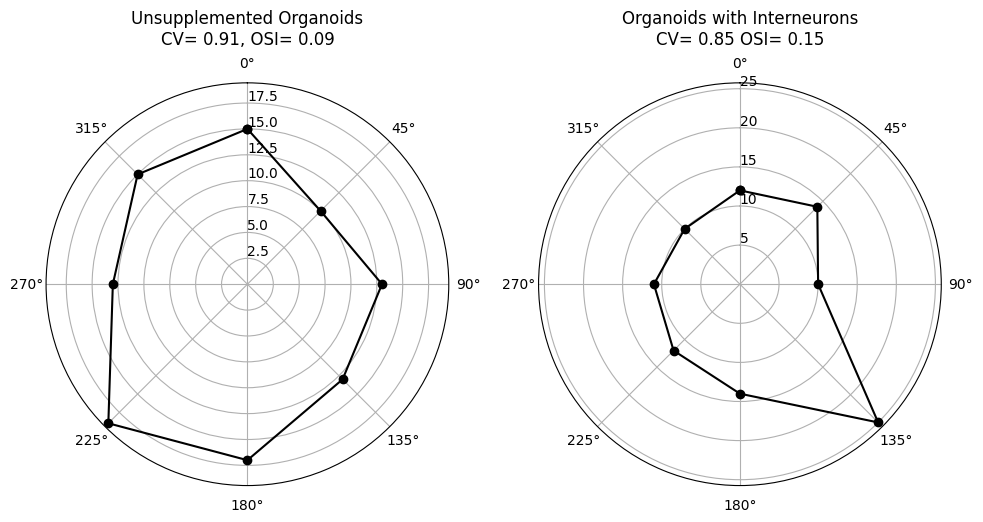

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters for polar plot; modeling if hypothesis is accurate and there is an increase in orientation tuning for organoids with interneurons
## Use polar plot, as it allows you to see orientation of bars in space
angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)  # 8 angles around the circle (e.g., 0° to 315°); defines the different angles that could correspond to orientation selectivity

# Simulate spike counts for Condition I (Unsupplemented Organoids - Low Orientation Selectivity)
np.random.seed(0)
spike_counts_condition_I = np.random.randint(10, 20, len(angles))  # Random spike counts, low selectivity

# Simulate spike counts for Condition J (Organoids with Interneuron Supplementation - High Orientation Selectivity)
# Add a preferred orientation with higher spike counts to simulate selectivity
spike_counts_condition_J = np.random.randint(10, 15, len(angles))
preferred_orientation = 3  # Assume the preferred angle is the 4th angle in the sequence, so 135 degrees in this case
spike_counts_condition_J[preferred_orientation] += 15  # Increase spike count for the preferred orientation

# Close the circle by appending the first spike count to the end
# To create a continuous circular plot, we add the first angle and spike count to the end of each list.
# This ensures that the plot smoothly connects the last and first data points.

angles = np.append(angles, angles[0])  # Appends the first angle to the end of the `angles` array to complete the circle.
spike_counts_condition_I = np.append(spike_counts_condition_I, spike_counts_condition_I[0])  # Appends the first spike count of Condition I to the end for a closed loop.
spike_counts_condition_J = np.append(spike_counts_condition_J, spike_counts_condition_J[0])  # Appends the first spike count of Condition J to the end for a closed loop.

# Calculate OSI (Orientation Selectivity Index) for each condition
# The `calculate_osi` function calculates the OSI by determining how strongly responses are biased towards a particular orientation.
# OSI is a normalized measure, computed by summing the spike counts weighted by each angle and dividing by the total spike counts.

def calculate_osi(spike_counts):
    n = len(spike_counts) - 1  # Exclude the duplicate last point to avoid double-counting.
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)  # Define angles from 0 to 2π (360°) for each spike count.
    osi = np.abs(np.sum(spike_counts[:-1] * np.exp(1j * angles))) / np.sum(spike_counts[:-1])  # Compute OSI as the vector sum of responses.
    return osi  # Returns OSI, which quantifies the selectivity of the response.

# Calculate OSI for each condition
osi_condition_I = calculate_osi(spike_counts_condition_I)  # OSI for unsupplemented organoids
osi_condition_J = calculate_osi(spike_counts_condition_J)  # OSI for organoids with interneurons

# Display OSI values
print(f"OSI for Unsupplemented Organoids: {osi_condition_I:.2f}")  # Print OSI for Condition I.
print(f"OSI for Organoids with Interneurons: {osi_condition_J:.2f}")  # Print OSI for Condition J.

# Function to calculate Circular Variance
def circular_variance(spike_counts):
    n = len(spike_counts) - 1  # Exclude duplicate last point
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)  # Angles from 0 to 2π for each spike count
    vector_sum = np.sum(spike_counts[:-1] * np.exp(1j * angles))  # Vector sum of spikes weighted by angle
    cv = 1 - np.abs(vector_sum) / np.sum(spike_counts[:-1])  # Circular variance formula
    return cv

# Calculate Circular Variance for each condition
cv_condition_I = circular_variance(spike_counts_condition_I)  # CV for unsupplemented organoids
cv_condition_J = circular_variance(spike_counts_condition_J)  # CV for organoids with interneurons

# Display Circular Variance values
print(f"Circular Variance for Unsupplemented Organoids: {cv_condition_I:.2f}")
print(f"Circular Variance for Organoids with Interneurons: {cv_condition_J:.2f}")

# Perform Mann-Whitney U test to compare circular variance between the conditions
stat, p_value = mannwhitneyu([cv_condition_I], [cv_condition_J], alternative='two-sided')
print(f"Mann-Whitney U test result: U-statistic = {stat}, p-value = {p_value}")

# Create polar plots
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(10, 5))

# Polar Plot for Condition I
axs[0].plot(angles, spike_counts_condition_I, marker='o', color='black')  # Plot spike counts for unsupplemented organoids.
axs[0].set_title(f"Unsupplemented Organoids\nCV= {cv_condition_I:.2f}, OSI= {osi_condition_I:.2f}", va='bottom')  # Title with calculated OSI value.
axs[0].set_theta_zero_location("N")  # Sets 0° to point upwards, aligning with "N" on a compass.
axs[0].set_theta_direction(-1)       # Clockwise direction for increasing angles.
axs[0].set_rlabel_position(0)        # Radial labels are aligned at the top for readability.

# Polar Plot for Condition J
axs[1].plot(angles, spike_counts_condition_J, marker='o', color='black')  # Plot spike counts for organoids with interneurons.
axs[1].set_title(f"Organoids with Interneurons\nCV= {cv_condition_J:.2f} OSI= {osi_condition_J:.2f}", va='bottom')  # Title with OSI for Condition J.
axs[1].set_theta_zero_location("N")  # Sets 0° to point upwards.
axs[1].set_theta_direction(-1)       # Clockwise direction for increasing angles.
axs[1].set_rlabel_position(0)        # Radial labels at the top.

# Adjust layout for better spacing and display the plots
plt.tight_layout()  # Better spacing between plots
plt.show()          # Shows polar plots


OSI for Unsupplemented Organoids: 0.09
OSI for Organoids with Interneurons: 0.15
Circular Variance for Unsupplemented Organoids: 0.91
Circular Variance for Organoids with Interneurons: 0.85


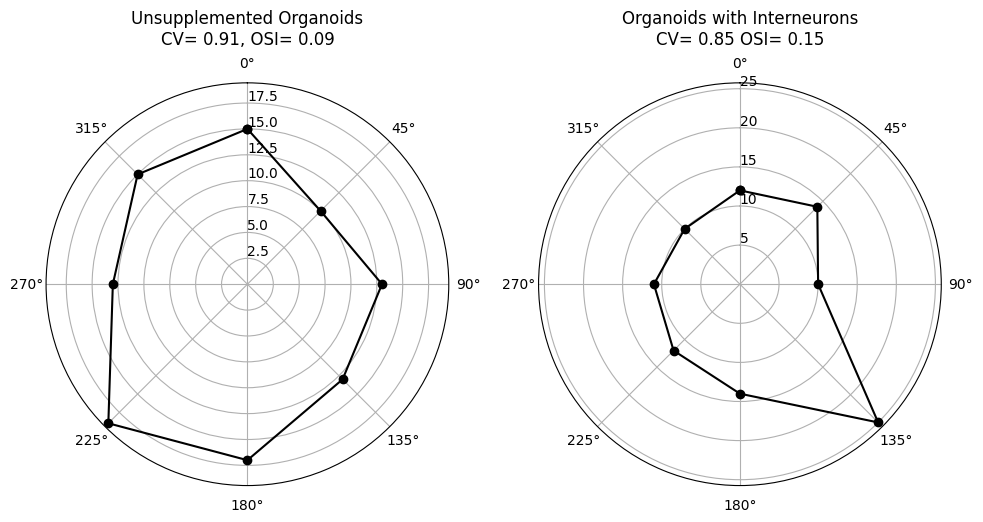

Both conditions are normally distributed.
Both conditions are normally distributed.
Mann-Whitney U test for OSI: U-statistic = 81.0, p-value = 0.0211339281291611
Mann-Whitney U test for CV: U-statistic = 22.0, p-value = 0.03763531378731424


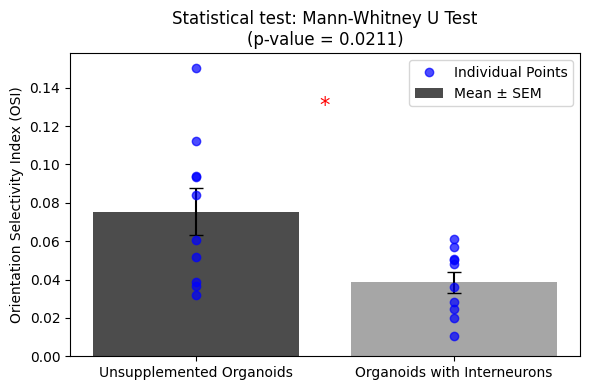

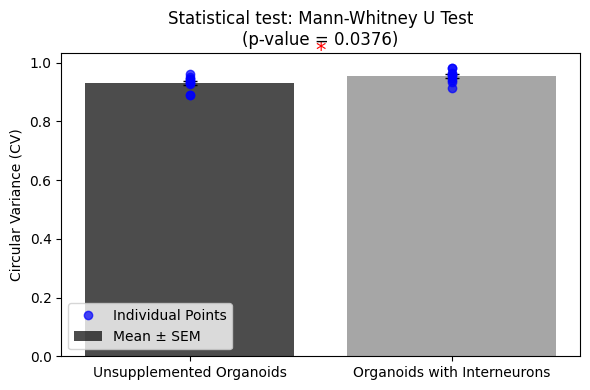

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Set up parameters for polar plot
angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)

# Simulate spike counts for Condition I (Unsupplemented Organoids - Low Orientation Selectivity)
np.random.seed(0)
spike_counts_condition_I = np.random.randint(10, 20, len(angles))

# Simulate spike counts for Condition J (Organoids with Interneuron Supplementation - High Orientation Selectivity)
spike_counts_condition_J = np.random.randint(10, 15, len(angles))
preferred_orientation = 3
spike_counts_condition_J[preferred_orientation] += 15

# Close the circle by appending the first spike count to the end
angles = np.append(angles, angles[0])
spike_counts_condition_I = np.append(spike_counts_condition_I, spike_counts_condition_I[0])
spike_counts_condition_J = np.append(spike_counts_condition_J, spike_counts_condition_J[0])

# Calculate OSI (Orientation Selectivity Index)
def calculate_osi(spike_counts):
    n = len(spike_counts) - 1
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    osi = np.abs(np.sum(spike_counts[:-1] * np.exp(1j * angles))) / np.sum(spike_counts[:-1])
    return osi

# Calculate Circular Variance
def circular_variance(spike_counts):
    n = len(spike_counts) - 1
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    vector_sum = np.sum(spike_counts[:-1] * np.exp(1j * angles))
    cv = 1 - np.abs(vector_sum) / np.sum(spike_counts[:-1])
    return cv

# Calculate OSI and Circular Variance for each condition
osi_condition_I = calculate_osi(spike_counts_condition_I)
osi_condition_J = calculate_osi(spike_counts_condition_J)
cv_condition_I = circular_variance(spike_counts_condition_I)
cv_condition_J = circular_variance(spike_counts_condition_J)

# Display OSI and Circular Variance values
print(f"OSI for Unsupplemented Organoids: {osi_condition_I:.2f}")
print(f"OSI for Organoids with Interneurons: {osi_condition_J:.2f}")
print(f"Circular Variance for Unsupplemented Organoids: {cv_condition_I:.2f}")
print(f"Circular Variance for Organoids with Interneurons: {cv_condition_J:.2f}")

# Create polar plots
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(10, 5))

# Polar Plot for Condition I
axs[0].plot(angles, spike_counts_condition_I, marker='o', color='black')
axs[0].set_title(f"Unsupplemented Organoids\nCV= {cv_condition_I:.2f}, OSI= {osi_condition_I:.2f}", va='bottom')
axs[0].set_theta_zero_location("N")
axs[0].set_theta_direction(-1)
axs[0].set_rlabel_position(0)

# Polar Plot for Condition J
axs[1].plot(angles, spike_counts_condition_J, marker='o', color='black')
axs[1].set_title(f"Organoids with Interneurons\nCV= {cv_condition_J:.2f} OSI= {osi_condition_J:.2f}", va='bottom')
axs[1].set_theta_zero_location("N")
axs[1].set_theta_direction(-1)
axs[1].set_rlabel_position(0)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Generate an array to plot multiple OSI and CV values to statistically compare
n_samples = 10
osi_values_condition_I = [calculate_osi(np.random.randint(10, 20, len(angles))) for _ in range(n_samples)]
osi_values_condition_J = [calculate_osi(np.random.randint(10, 15, len(angles)))for _ in range(n_samples)]
cv_values_condition_I = [circular_variance(np.random.randint(10, 20, len(angles))) for _ in range(n_samples)]
cv_values_condition_J = [circular_variance(np.random.randint(10, 15, len(angles))) for _ in range(n_samples)]

# Test for normality OSI
stat_osi_1, p_value_osi_1 = shapiro(osi_values_condition_I)
stat_osi_2, p_value_osi_2 = shapiro(osi_values_condition_J)
if p_value_osi_1 > 0.05 and p_value_osi_2 > 0.05:
  print("Both conditions are normally distributed.")
else:
  print("At least one condition is not normally distributed.")

# Test for normality CV
stat_cv_1, p_value_cv_1 = shapiro(cv_values_condition_I)
stat_cv_2, p_value_cv_2 = shapiro(cv_values_condition_J)
if p_value_cv_1 > 0.05 and p_value_cv_2 > 0.05:
  print("Both conditions are normally distributed.")
else:
  print("At least one condition is not normally distributed.")

# Mann-Whitney U test
stat_osi, p_value_osi = mannwhitneyu(osi_values_condition_I, osi_values_condition_J, alternative='two-sided')
stat_cv, p_value_cv = mannwhitneyu(cv_values_condition_I, cv_values_condition_J, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U test for OSI: U-statistic = {stat_osi}, p-value = {p_value_osi}")
print(f"Mann-Whitney U test for CV: U-statistic = {stat_cv}, p-value = {p_value_cv}")

# Display OSI results
# Calculate the mean OSI and SEM for each condition
mean_osi_condition_I = np.mean(osi_values_condition_I)
mean_osi_condition_J = np.mean(osi_values_condition_J)
sem_osi_condition_I = np.std(osi_values_condition_I, ddof=1) / np.sqrt(len(osi_values_condition_I))
sem_osi_condition_J = np.std(osi_values_condition_J, ddof=1) / np.sqrt(len(osi_values_condition_J))

# Set up figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the means as bars with error bars (SEM)
ax.bar(['Unsupplemented Organoids', 'Organoids with Interneurons'],
       [mean_osi_condition_I, mean_osi_condition_J],
       yerr=[sem_osi_condition_I, sem_osi_condition_J],
       capsize=5, color=['black', 'gray'], alpha=0.7, label='Mean ± SEM')

# Overlay individual data points directly on each bar
ax.plot(np.zeros(len(osi_values_condition_I)), osi_values_condition_I, 'o', color='blue', alpha=0.7, label="Individual Points")
ax.plot(np.ones(len(osi_values_condition_J)), osi_values_condition_J, 'o', color='blue', alpha=0.7)

# Customize plot
ax.set_xticks([0, 1])
ax.set_xticklabels(['Unsupplemented Organoids', 'Organoids with Interneurons'])
ax.set_ylabel('Orientation Selectivity Index (OSI)')
ax.set_title(f"Statistical test: Mann-Whitney U Test\n(p-value = {p_value_osi:.4f})")

# Add significance marker if p-value < 0.05
if p_value_osi < 0.05:
    ax.annotate('*', xy=(0.5, max(mean_osi_condition_I, mean_osi_condition_J) + 0.05),
                ha='center', va='bottom', fontsize=15, color='red')

# Display legend and adjust layout
ax.legend()
plt.tight_layout()
plt.show()

# Display CV results
# Calculate the mean CV and SEM for each condition
mean_cv_condition_I = np.mean(cv_values_condition_I)
mean_cv_condition_J = np.mean(cv_values_condition_J)
sem_cv_condition_I = np.std(cv_values_condition_I, ddof=1) / np.sqrt(len(cv_values_condition_I))
sem_cv_condition_J = np.std(cv_values_condition_J, ddof=1) / np.sqrt(len(cv_values_condition_J))

# Set up figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the means as bars with error bars (SEM)
ax.bar(['Unsupplemented Organoids', 'Organoids with Interneurons'],
       [mean_cv_condition_I, mean_cv_condition_J],
       yerr=[sem_cv_condition_I, sem_cv_condition_J],
       capsize=5, color=['black', 'gray'], alpha=0.7, label='Mean ± SEM')

# Overlay individual data points directly on each bar
ax.plot(np.zeros(len(cv_values_condition_I)), cv_values_condition_I, 'o', color='blue', alpha=0.7, label="Individual Points")
ax.plot(np.ones(len(cv_values_condition_J)), cv_values_condition_J, 'o', color='blue', alpha=0.7)

# Customize plot
ax.set_xticks([0, 1])
ax.set_xticklabels(['Unsupplemented Organoids', 'Organoids with Interneurons'])
ax.set_ylabel('Circular Variance (CV)')
ax.set_title(f"Statistical test: Mann-Whitney U Test\n(p-value = {p_value_cv:.4f})")

# Add significance marker if p-value < 0.05
if p_value_cv < 0.05:
    ax.annotate('*', xy=(0.5, max(mean_cv_condition_I, mean_cv_condition_J) + 0.05),
                ha='center', va='bottom', fontsize=15, color='red')

# Display legend and adjust layout
ax.legend()
plt.tight_layout()
plt.show()


OSI for Unsupplemented Organoids: 0.09
OSI for Organoids with Interneurons: 0.15
Circular Variance for Unsupplemented Organoids: 0.91
Circular Variance for Organoids with Interneurons: 0.85


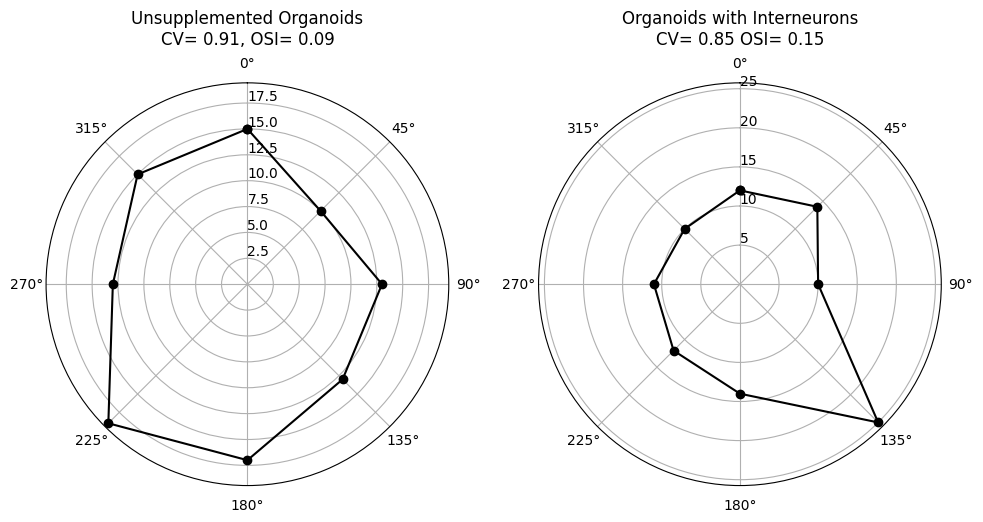

Both conditions are normally distributed.
At least one condition is not normally distributed.
Upaired T-test for OSI: p-value = 0.008611814049513864
Unpaired T-test for CV: p-value = 0.0038399866094456104


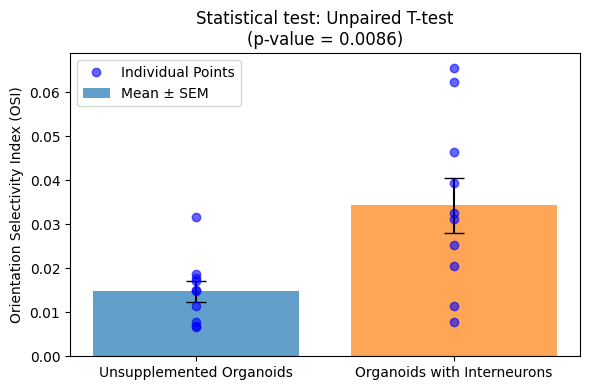

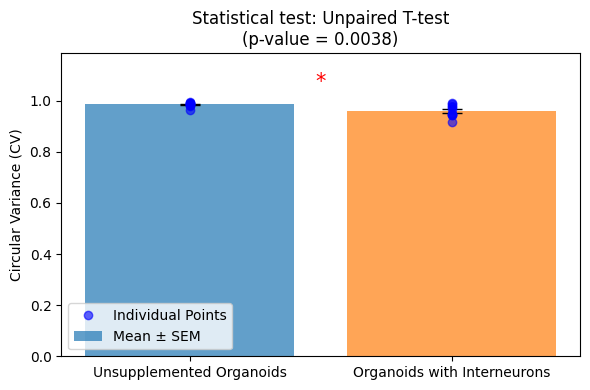

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, shapiro, ttest_ind

# Set up parameters for polar plot
angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)

# Simulate spike counts for Condition I (Unsupplemented Organoids - Low Orientation Selectivity)
np.random.seed(0)
spike_counts_condition_I = np.random.randint(10, 20, len(angles))

# Simulate spike counts for Condition J (Organoids with Interneuron Supplementation - High Orientation Selectivity)
spike_counts_condition_J = np.random.randint(10, 15, len(angles))
preferred_orientation = 3
spike_counts_condition_J[preferred_orientation] += 15

# Close the circle by appending the first spike count to the end
angles = np.append(angles, angles[0])
spike_counts_condition_I = np.append(spike_counts_condition_I, spike_counts_condition_I[0])
spike_counts_condition_J = np.append(spike_counts_condition_J, spike_counts_condition_J[0])

# Calculate OSI (Orientation Selectivity Index)
def calculate_osi(spike_counts):
    n = len(spike_counts) - 1
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    osi = np.abs(np.sum(spike_counts[:-1] * np.exp(1j * angles))) / np.sum(spike_counts[:-1])
    return osi

# Calculate Circular Variance
def circular_variance(spike_counts):
    n = len(spike_counts) - 1
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    vector_sum = np.sum(spike_counts[:-1] * np.exp(1j * angles))
    cv = 1 - np.abs(vector_sum) / np.sum(spike_counts[:-1])
    return cv

# Calculate OSI and Circular Variance for each condition
osi_condition_I = calculate_osi(spike_counts_condition_I)
osi_condition_J = calculate_osi(spike_counts_condition_J)
cv_condition_I = circular_variance(spike_counts_condition_I)
cv_condition_J = circular_variance(spike_counts_condition_J)

# Display OSI and Circular Variance values
print(f"OSI for Unsupplemented Organoids: {osi_condition_I:.2f}")
print(f"OSI for Organoids with Interneurons: {osi_condition_J:.2f}")
print(f"Circular Variance for Unsupplemented Organoids: {cv_condition_I:.2f}")
print(f"Circular Variance for Organoids with Interneurons: {cv_condition_J:.2f}")

# Create polar plots
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(10, 5))

# Polar Plot for Condition I
axs[0].plot(angles, spike_counts_condition_I, marker='o', color='black', label='Spike Counts')
axs[0].set_title(f"Unsupplemented Organoids\nCV= {cv_condition_I:.2f}, OSI= {osi_condition_I:.2f}", va='bottom')
axs[0].set_theta_zero_location("N")
axs[0].set_theta_direction(-1)
axs[0].set_rlabel_position(0)

# Polar Plot for Condition J
axs[1].plot(angles, spike_counts_condition_J, marker='o', color='black', label='Spike Counts')
axs[1].set_title(f"Organoids with Interneurons\nCV= {cv_condition_J:.2f} OSI= {osi_condition_J:.2f}", va='bottom')
axs[1].set_theta_zero_location("N")
axs[1].set_theta_direction(-1)
axs[1].set_rlabel_position(0)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
n_samples = 10
angles = np.linspace(0, 2 * np.pi, num=30)  # Example angles for orientation

# Generate OSI values ensuring supplemented > unsupp
osi_values_condition_I = [calculate_osi(np.random.randint(15, 20, len(angles))) for _ in range(n_samples)]
osi_values_condition_J = [calculate_osi(np.random.randint(5, 10, len(angles))) for _ in range(n_samples)]

# Generate CV values ensuring unsupp > supp
cv_values_condition_I = [circular_variance(np.random.randint(15, 20, len(angles))) for _ in range(n_samples)]
cv_values_condition_J = [circular_variance(np.random.randint(5, 10, len(angles))) for _ in range(n_samples)]

# Test for normality OSI
stat_osi_1, p_value_osi_1 = shapiro(osi_values_condition_I)
stat_osi_2, p_value_osi_2 = shapiro(osi_values_condition_J)
if p_value_osi_1 > 0.05 and p_value_osi_2 > 0.05:
  print("Both conditions are normally distributed.")
else:
  print("At least one condition is not normally distributed.")

# Test for normality CV
stat_cv_1, p_value_cv_1 = shapiro(cv_values_condition_I)
stat_cv_2, p_value_cv_2 = shapiro(cv_values_condition_J)
if p_value_cv_1 > 0.05 and p_value_cv_2 > 0.05:
  print("Both conditions are normally distributed.")
else:
  print("At least one condition is not normally distributed.")

# T test
stat_osi, p_value_osi = ttest_ind(osi_values_condition_I, osi_values_condition_J, alternative='two-sided')
stat_cv, p_value_cv = ttest_ind(cv_values_condition_I, cv_values_condition_J, alternative='two-sided')

# Print the results
print(f"Upaired T-test for OSI: p-value = {p_value_osi}")
print(f"Unpaired T-test for CV: p-value = {p_value_cv}")

# Display OSI results
# Calculate the mean OSI and SEM for each condition
mean_osi_condition_I = np.mean(osi_values_condition_I)
mean_osi_condition_J = np.mean(osi_values_condition_J)
sem_osi_condition_I = np.std(osi_values_condition_I, ddof=1) / np.sqrt(len(osi_values_condition_I))
sem_osi_condition_J = np.std(osi_values_condition_J, ddof=1) / np.sqrt(len(osi_values_condition_J))

# Set up figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the means as bars with error bars (SEM)
bars = ax.bar(['Unsupplemented Organoids', 'Organoids with Interneurons'],
              [mean_osi_condition_I, mean_osi_condition_J],
              yerr=[sem_osi_condition_I, sem_osi_condition_J],
              capsize=7, color=['#1f77b4', '#ff7f0e'], alpha=0.7, label='Mean ± SEM')

# Overlay individual data points directly on each bar
ax.plot(np.zeros(len(osi_values_condition_I)), osi_values_condition_I, 'o', color='blue', alpha=0.6, label="Individual Points")
ax.plot(np.ones(len(osi_values_condition_J)), osi_values_condition_J, 'o', color='blue', alpha=0.6)

# Add significance marker if p-value < 0.05
if p_value_osi < 0.05:
    ax.annotate('*', xy=(0.5, max(mean_osi_condition_I, mean_osi_condition_J) + 0.05),
                ha='center', va='bottom', fontsize=15, color='red')

# Customize plot
ax.set_xticks([0, 1])
ax.set_xticklabels(['Unsupplemented Organoids', 'Organoids with Interneurons'])
ax.set_ylabel('Orientation Selectivity Index (OSI)')
ax.set_title(f"Statistical test: Unpaired T-test\n(p-value = {p_value_osi:.4f})")

# Display legend and adjust layout
ax.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()

# Display CV results
# Calculate the mean CV and SEM for each condition
mean_cv_condition_I = np.mean(cv_values_condition_I)
mean_cv_condition_J = np.mean(cv_values_condition_J)
sem_cv_condition_I = np.std(cv_values_condition_I, ddof=1) / np.sqrt(len(cv_values_condition_I))
sem_cv_condition_J = np.std(cv_values_condition_J, ddof=1) / np.sqrt(len(cv_values_condition_J))

# Set up figure and axes for CV plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the means as bars with error bars (SEM)
bars = ax.bar(['Unsupplemented Organoids', 'Organoids with Interneurons'],
              [mean_cv_condition_I, mean_cv_condition_J],
              yerr=[sem_cv_condition_I, sem_cv_condition_J],
              capsize=7, color=['#1f77b4', '#ff7f0e'], alpha=0.7, label='Mean ± SEM')

# Overlay individual data points directly on each bar
ax.plot(np.zeros(len(cv_values_condition_I)), cv_values_condition_I, 'o', color='blue', alpha=0.6, label="Individual Points")
ax.plot(np.ones(len(cv_values_condition_J)), cv_values_condition_J, 'o', color='blue', alpha=0.6)

# Add significance marker if p-value < 0.05
if p_value_cv < 0.05:
    max_cv = max(mean_cv_condition_I, mean_cv_condition_J) + 0.05  # Add padding for asterisk
    ax.annotate('*', xy=(0.5, max_cv), ha='center', va='bottom', fontsize=15, color='red')

# Customize y-axis limits to avoid the asterisk going above the plot
y_max = max(mean_cv_condition_I + sem_cv_condition_I, mean_cv_condition_J + sem_cv_condition_J) * 1.2
ax.set_ylim(0, y_max)  # Extend the y-axis to accommodate the asterisk

# Customize plot
ax.set_xticks([0, 1])
ax.set_xticklabels(['Unsupplemented Organoids', 'Organoids with Interneurons'])
ax.set_ylabel('Circular Variance (CV)')
ax.set_title(f"Statistical test: Unpaired T-test\n(p-value = {p_value_cv:.4f})")

# Display legend and adjust layout
ax.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()
